In [1]:
!pip install pandas fiona shapely pyproj rtree 
!pip install contextily
!pip install geopandas

In [2]:
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt

Installtion de Cartiflette pour la recuperation des fonds de cartes 

In [3]:
!pip install --upgrade botocore==1.23.26  #Sur colab, sinon bug
!pip install --upgrade urllib3==1.22.0 #Sur colab, sinon bug
!pip install py7zr #Sur colab, sinon bug
!pip install s3fs #Sur colab, sinon bug
!git clone https://github.com/InseeFrLab/cartogether.git
%cd ./cartogether
!pip install -r requirements.txt
!pip install .

  Using cached urllib3-1.22-py2.py3-none-any.whl (132 kB)
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.26.13
    Uninstalling urllib3-1.26.13:
      Successfully uninstalled urllib3-1.26.13
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
botocore 1.23.26 requires urllib3<1.27,>=1.25.4, but you have urllib3 1.22 which is incompatible.
boto3 1.26.13 requires botocore<1.30.0,>=1.29.13, but you have botocore 1.23.26 which is incompatible.
  Using cached urllib3-1.26.13-py2.py3-none-any.whl (140 kB)
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.22
    Uninstalling urllib3-1.22:
      Successfully uninstalled urllib3-1.22
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
boto3 1.26.13 r

Téléchargement des cartes des 8 departements de l'ile de France

In [50]:
import cartiflette.s3

shp_communes = cartiflette.s3.download_vectorfile_url_all(
    values = ["75","77","78","91","92","93","94","95"],
    level="COMMUNE",
    vectorfile_format="geojson",
    decoupage="departement",
    year=2022)

Downloading: : 69.7kiB [00:00, 13.0MiB/s]
Downloading: : 17.1MiB [00:00, 64.9MiB/s]
Downloading: : 4.84MiB [00:00, 82.5MiB/s]
Downloading: : 4.08MiB [00:00, 73.9MiB/s]
Downloading: : 397kiB [00:00, 33.9MiB/s]
Downloading: : 893kiB [00:00, 52.6MiB/s]
Downloading: : 800kiB [00:00, 59.0MiB/s]
Downloading: : 2.88MiB [00:00, 61.3MiB/s]


In [34]:
arrondissements = cartiflette.s3.download_vectorfile_url_all( # Les communes de Paris
    values = "75",
    level="ARRONDISSEMENT_MUNICIPAL",
    vectorfile_format="geojson",
    decoupage="departement",
    year=2022)

Downloading: : 245kiB [00:00, 27.0MiB/s]


In [51]:
import pandas as pd

shp_communes = pd.concat(
  [
    shp_communes[shp_communes['INSEE_DEP'] != "75"],
    arrondissements
  ])

La cartes des huits départements de l'Ile de France

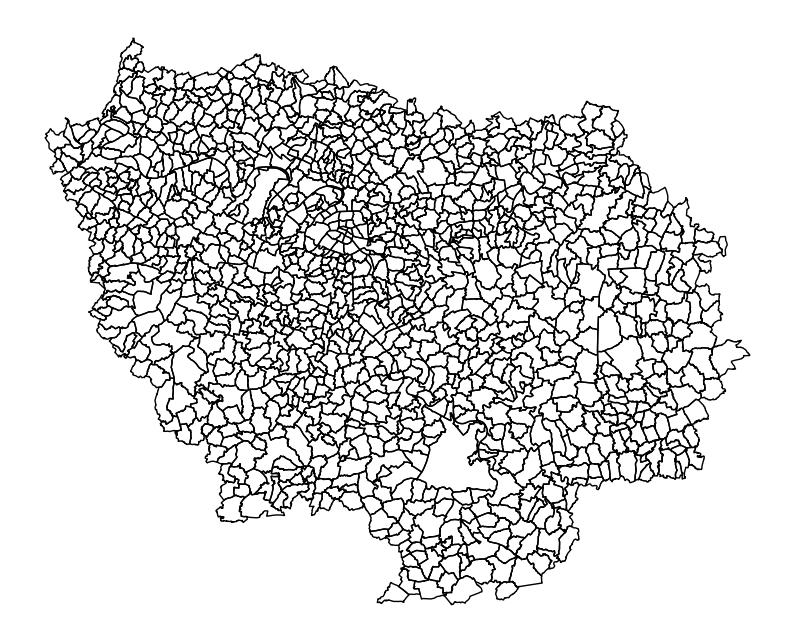

In [52]:
fig,ax = plt.subplots(figsize=(10, 10))
shp_communes.to_crs(3857).plot(ax = ax, zorder=1, edgecolor = "black", facecolor="none",
                                                           color = None)
ax.set_axis_off()

La carte du departement de Paris (75)

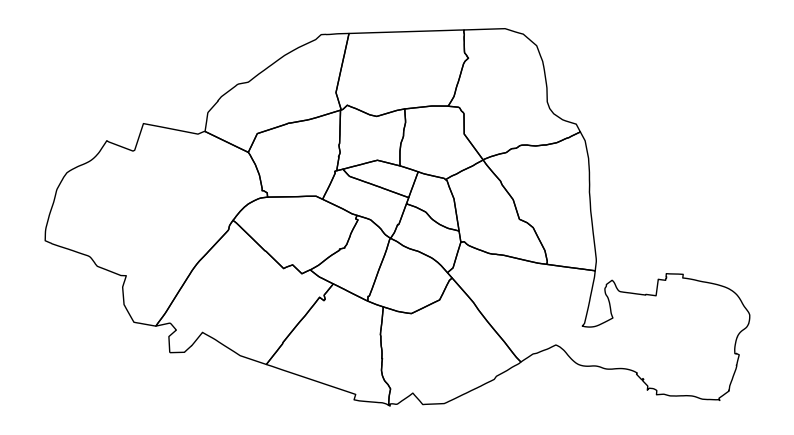

In [53]:
fig,ax = plt.subplots(figsize=(10, 10))
shp_communes[shp_communes['INSEE_DEP'] == "75"].to_crs(3857).plot(ax = ax, zorder=1, edgecolor = "black", facecolor="none",
                                                           color = None)
ax.set_axis_off()

La carte du departement d'Essonne (91)

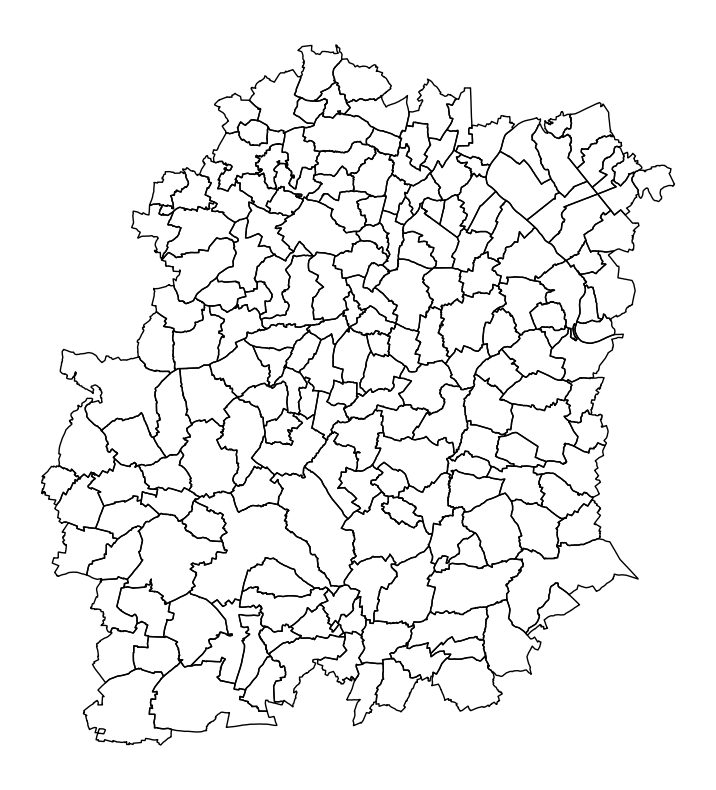

In [55]:
fig,ax = plt.subplots(figsize=(10, 10))
shp_communes[shp_communes['INSEE_DEP'] == "91"].to_crs(3857).plot(ax = ax, zorder=1, edgecolor = "black", facecolor="none",
                                                           color = None)
ax.set_axis_off()

**On peut faire l'étude pour les differents huits département de manière séparées juste dans le but d'éviter d'avoir de figures ilisibles**

*Il suffit de bien le faire pour un seul departement et de généraliser dans les autres départements.*